In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cubic = pd.read_csv('./training_mse/seed_1_sequential_mse.txt', sep ='\t', header = None)
mixed = pd.read_csv('./training_mse/seed_1_mixed_sequential_mse.txt', sep ='\t', header = None)

In [3]:
cubic = cubic.rename(columns={1:'Cubic'})
cubic['training_step'] = cubic.index
cubic

,0,Cubic,training_step
0,0,9467.130859,0
1,0,9066.834961,1
2,0,10686.373047,2
3,0,8618.612305,3
4,0,8539.622070,4
...,...,...,...
499996,0,1468.852295,499996
499997,0,1454.780151,499997
499998,0,1401.101562,499998
499999,0,1904.366943,499999


In [4]:
mixed = mixed.rename(columns={0:'Task',1:'Mixed'})
mixed = mixed[mixed['Task'] == 2].reset_index(drop=True)
mixed['training_step'] = mixed.index
mixed

,Task,Mixed,training_step
0,2,7354.962402,0
1,2,13480.233398,1
2,2,8694.552734,2
3,2,8606.905273,3
4,2,10681.535156,4
...,...,...,...
55064,2,1469.983398,55064
55065,2,1382.894043,55065
55066,2,2099.129883,55066
55067,2,910.181335,55067


In [5]:
joint = cubic.merge(mixed, on='training_step', how='left')
joint

,0,Cubic,training_step,Task,Mixed
0,0,9467.130859,0,2.0,7354.962402
1,0,9066.834961,1,2.0,13480.233398
2,0,10686.373047,2,2.0,8694.552734
3,0,8618.612305,3,2.0,8606.905273
4,0,8539.622070,4,2.0,10681.535156
...,...,...,...,...,...
499996,0,1468.852295,499996,NaN,NaN
499997,0,1454.780151,499997,NaN,NaN
499998,0,1401.101562,499998,NaN,NaN
499999,0,1904.366943,499999,NaN,NaN


In [6]:
training_steps = joint['training_step']
cubic_y = joint['Cubic']
mixed_y = joint['Mixed']

In [7]:
mv_cubic = cubic_y.rolling(window=1000).mean()/20
mv_mixed = mixed_y.rolling(window=1000).mean()/20
head_dir="/Users/harmonbhasin/College/Research/huLab/paper_figures/task_mask"

In [8]:
mv_mixed.last_valid_index()
mv_mixed
mv_cubic

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
499996    95.950143
499997    95.916964
499998    95.873773
499999    95.852110
500000    95.831106
Name: Cubic, Length: 500001, dtype: float64

In [9]:
shifted_mv_mixed = mv_mixed.fillna(method='bfill')
shifted_mv_mixed
continuation = shifted_mv_mixed.fillna(mv_mixed[mv_mixed.last_valid_index()])
continuation

0         198.175171
1         198.175171
2         198.175171
3         198.175171
4         198.175171
             ...    
499996     69.068576
499997     69.068576
499998     69.068576
499999     69.068576
500000     69.068576
Name: Mixed, Length: 500001, dtype: float64

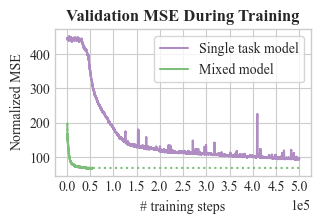

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-whitegrid')  # Set the aesthetic style of the plots
fig, ax = plt.subplots(figsize=(3.3, 1.9))  # Create a figure and axes object
x_ticks = np.arange(0, 500001, 50000)
ax.set_xticks(x_ticks)
ax.tick_params(axis='both', labelsize=10)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax.xaxis.offsetText.set_fontname('Times New Roman')
ax.yaxis.offsetText.set_fontname('Times New Roman')

ax.plot(training_steps, mv_cubic, color = '#af8dc3', label='Single task model')
ax.plot(training_steps, mv_mixed, color = '#7fbf7b', label='Mixed model')
ax.plot(training_steps, continuation, color = '#7fbf7b', label='', linestyle='dotted')
ax.legend(prop={'family': 'Times New Roman', 'size': 10}, frameon=True)
ax.set_xlabel('# training steps', fontname='Times New Roman', fontsize=10)
ax.set_ylabel('Normalized MSE', fontname='Times New Roman', fontsize=10)
ax.set_title('Validation MSE During Training',fontname='Times New Roman', fontsize=12, fontweight='bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Times New Roman')
        label.set_fontsize(10)
plt.savefig(f"{head_dir}/figure_2_efficiency_new.pdf", bbox_inches='tight')
